# Анализ закономерностей успешности игр

## Описание
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Нужно отработать принцип работы с данными.

## Оглавление
- [Шаг 1. Изучение общей информации файла.](#step1)
- [Шаг 2. Подготовка данных.](#step2)
- [Шаг 3. Исследовательский анализ данных.](#step3)
- [Шаг 4. Портрет пользователя каждого региона.](#step4)
- [Шаг 5. Проверка гипотезы.](#step5)

## Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math
import seaborn as sns
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.scale = 1.2

### Шаг 1. Изучение общей информации файла. <a id=step1></a>

In [3]:
data = pd.read_csv('games.csv')
display(data.describe())
display(data.columns)
display(data.info())
display(data.head(10))

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1.5       2
0.3       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

#### Вывод
1. Привели все названий столбцов к нижнему регистру.
2. Мы имеем пропуски в столбцах: "название", "год выпуска", "жанр", "оценка критиков", "оценка пользователей", "рейтинг от организации ESRB".
3. Столбец с данными о годе выпуска является числом с плавающей точной, что нужно привести к целому числу.
4. Также в данных с рейтингом пользователей есть значение 'tbd', что означает to be determined или "будет определено". Пока этим играм пользователи не поставили рейтинг, поэтому его можно будет заменить на удобное для нас значение. Важно! не подставлять срадние и медианы, так как игры индивидуальны, мы не можем решить за всех пользователей, насколько классной была игра.

### Шаг 2. Подготовка данных. <a id=step2></a>

Заменим названия столбцов (приведем к нижнему регистру).

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
# Есть интересные две строки, где мы находим минимум информации, 
# эти строки мы удалим.
data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
data.dropna(subset = ['genre'], inplace=True)
len(data.loc[data['genre'].isna()])

0

У нас есть пропуски в столбце с годом выпуска, таких пропусков 269. Это не так много, но не хочется терять остальные данные в этих строках, поэтому заменим пропуски на 0, чтобы потом можно было бы легко отфильтровать.

In [8]:
# Создадим датафрейм без неизвестных значений в столбце с годом выпуска.

name_year = data[data['year_of_release'].notnull()]
name_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [9]:
# Для дальнейшей проверки, заполнились ли пропуски, мне нужна игра, которую выпустили на нескольких платформах.
# Здесь мы ее и выберем, а потом закомментируем.

data.loc[data['year_of_release'].isna()]

#data.query('name == "LEGO Batman: The Videogame"')
#data.query('name == "Virtua Quest"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Создаем функцию, которая на место пропусков в годе выпуска поставит год такой же игры, но только с другой платформы (если такая имеется).

In [10]:
def fill_year(row):
    if np.isnan(row['year_of_release']):
        try:
            return name_year.loc[name_year['name'] == row['name'], 'year_of_release'].array[0]
        except: pass
    return row['year_of_release']

data['year_of_release'] = data.apply(fill_year, axis=1)
display(data.query('name == "LEGO Batman: The Videogame"'))
display(len(data[data['year_of_release'].isna()]))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,2008.0,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,2008.0,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


146

После заполнения пропусков функцией, у нас осталось 146 незаполненных значений в годе выпуска. На их место поставим нейтральное значение "1000", чтобы потом можно было его легко отфильтровать.

После заполнения изменим тип данных в этом столбце на целое число - привычный вид даты.

In [11]:
data['year_of_release'] = data['year_of_release'].fillna(1000)

data['year_of_release'] = data['year_of_release'].astype('int')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
data.sort_values('critic_score')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13689,Ride to Hell,PS3,2013,Racing,0.02,0.01,0.00,0.01,13.0,1,M
10662,Leisure Suit Larry: Box Office Bust,PS3,2009,Adventure,0.06,0.03,0.00,0.01,17.0,1.7,M
12822,Ride to Hell,X360,2013,Racing,0.04,0.01,0.00,0.01,19.0,1.3,M
10015,Rugby 15,PS4,2015,Sports,0.04,0.06,0.00,0.02,19.0,3.4,E
15343,Balls of Fury,Wii,2007,Sports,0.02,0.00,0.00,0.00,19.0,2.8,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас остались пропуски в столбцах с оценками и рейтингом. Мы не можем предположить исходя из каких-то других данных, какая могла быть оценка у той или иной игры. 

Везде пропуски заменим на произвольное 200, чтобы также было легко их отфильтровать и убрать при анализе этих данных и не спутать с уже имеющимися значениями.

In [13]:
for column in ['critic_score', 'user_score', 'rating']:
    data[column] = data[column].fillna(200)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


Необходимо привести оценку критиков к типу int, так как после запятой нет никаких значимых показаний.

In [14]:
data['critic_score'] = data['critic_score'].astype('int')

display(data.info())
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
dtypes: float64(4), int32(2), object(5)
memory usage: 1.4+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,200,200,200
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,200,200,200
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,200,200,200
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,200,200,200


- Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать

Ранее мы определили 'tbd' как 'to be determined' или "будет определено", что означает, что пока что пользователи не проставили свои оценки. В этом случае мы также заменит значение 'tbd' на 0.

In [15]:
data['user_score'].value_counts().head()

200    6699
tbd    2424
7.8     324
8       290
8.2     282
Name: user_score, dtype: int64

In [16]:
data['user_score'] = data['user_score'].replace('tbd', 200)
data['user_score'].value_counts().head()

200    9123
7.8     324
8       290
8.2     282
8.3     254
Name: user_score, dtype: int64

- Посчитаем суммарные продажи во всех регионах в отдельный столбец.

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,200,200,200,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,200,200,200,31.38


### Вывод

1. Мы привели все названия столбцов к нижнему регистру.
2. Удалили строки с проусками в столбцах жанр и имя. Пропуски в годе выпуска заменили двумя вариантами - часть заменили годом той же игры на другой платформе, остальные же одним значением, которое легко будет отфильтровать при дальнейшем использовании этих данных. Пропуски в оценках и рейтинге также заменили на определенное значение для дальнейшей фильтрации.
3. Изменили типы в столбцах с годом выпуска и оценкой критиков на int.
4. Значения 'tbd' поменяли на 200, так как они еще не определены, и также чтобы было легко их отфильтровывать, не смешивая их с уже имеющимися значениями в Series.

### Шаг 3. Исследовательский анализ данных. <a id=step3></a>

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [18]:
data.query('year_of_release>1000').groupby(
    'year_of_release').agg({'name':'count'})

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


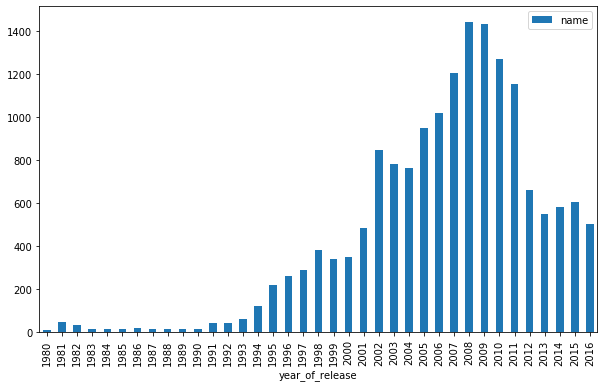

In [19]:
data.query('year_of_release>1000').groupby(
    'year_of_release').agg({'name':'count'}).plot(kind='bar', figsize=(10,6))

Самый пик по количеству выпущенных игр был в период с 2002 по 2011 год, с 2012 года их количество уменьшилось резко почти вдвое. Есть предположение, что количество выпускаемых игр связано с количеством платформ, которые выпускали игры в эти года. Проверим это ниже.

In [20]:
data_platforms = data[['year_of_release', 'platform']].sort_values('year_of_release')
data_platforms.duplicated().sum()
data_platforms = data_platforms.drop_duplicates().reset_index(drop=True)
data_platforms.groupby('year_of_release').agg({'platform':'count'})

,platform
year_of_release,
1000,16
1980,1
1981,1
1982,1
1983,2
1984,2
1985,4
1986,2
1987,2


Количество платформ сыграло свою роль, в некотором смысле, но мы видим, что с 2012 по 2016 было примерно столько же платформ, сколько и с 2002 по 2011. Более того, мы видимо по 10-11 платформ в 2000 и 2001 годах, однако это были не самые плодотворные годы.
Возможно, последние годы были устремлены не на количество, а на качество.

---------------------------------------------------------------------------

- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.

In [21]:
# Мы сначала посмотрели продажи по всем годам 
# вышло, что самые больше продажи у тех платформ, которые ныне не выпускают игр, 
# поэтому пока что рандомно взяли более актуальный период с 2013 года.
data.query('year_of_release > 2012').groupby('platform').agg(
    {'total_sales':'sum'}).sort_values('total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,40.06
PSV,32.99
Wii,13.66


In [22]:
data.query('year_of_release > 2012').groupby('platform').agg(
    {'name':'count'}).sort_values('name', ascending=False)

,name
platform,
PS4,392
PSV,358
PS3,345
3DS,303
XOne,247
PC,192
X360,186
WiiU,115
PSP,68


Для распределения по годам возьмем 5 платформ с наибольшими суммарными продажами: PS4, PS3, X360, WiiU, 3DS.

In [23]:
top_sales = data.query('year_of_release > 2012').groupby('platform').agg(
    {'total_sales':'sum'}).sort_values('total_sales', ascending=False).head(5)
top_sales

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


Text(0.5, 1.0, 'Продажи игр семи платформ в разные года')

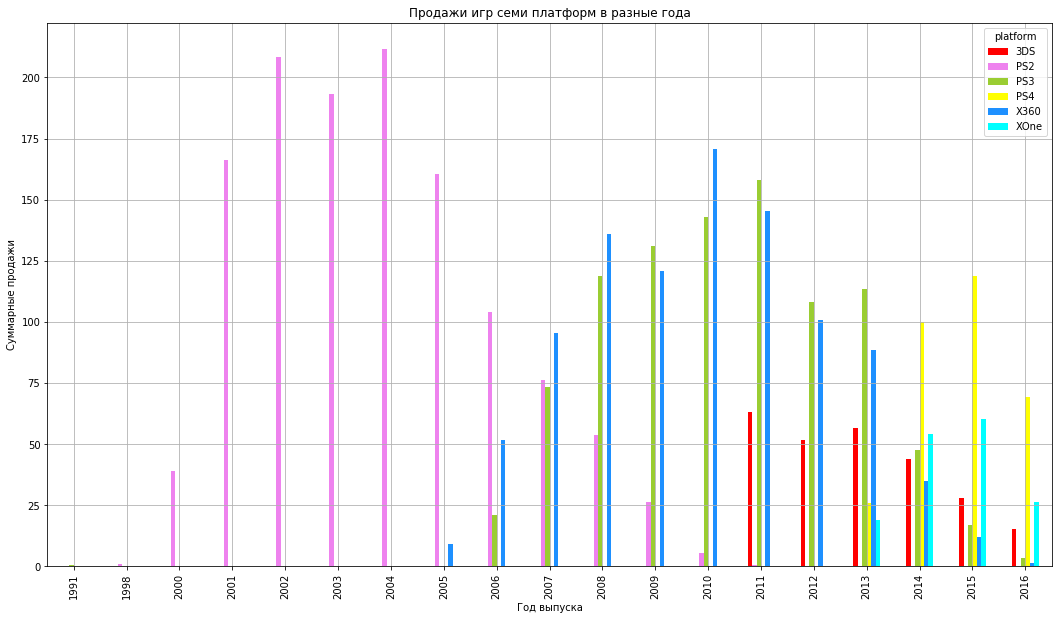

In [24]:
# Добавим в топ еще одну платформу из более разнних, чтобы взглянть на продолжительность жизни платформ.
top_platforms = ['PS4', 'PS3', 'X360', 'XOne', '3DS', 'PS2']
sales_df = data[['total_sales'] + ['year_of_release'] + ['platform']]
sales_pivot = sales_df.query('platform == @top_platforms & year_of_release>1000').pivot_table(index='year_of_release', 
                     columns='platform', 
                     values='total_sales', 
                     aggfunc='sum').plot(kind='bar', 
                                         figsize=(18,10), 
                                         grid=True,
                                         color=['red', 'violet', 'yellowgreen', 'yellow', 'dodgerblue', 'aqua'])
plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи')
plt.title('Продажи игр семи платформ в разные года')

Судя по диаграмме, платформа появляется и функционирует примерно 10-12 лет, от начала до пика популярности проходит примерно 5-6 лет, но так как нам нужны данные о компаниях, которые только набирают обороты на рынке, мы возьмем не 5 лет, а чуть меньше - 4 последних года, то есть с 2013 по 2016 года (в 2013 как раз только вышли PS4 и XOne).

In [25]:
lifetime_platform = data.query('year_of_release > 1999').groupby('platform').agg({'year_of_release':['max', 'min']})
lifetime_platform.columns = ['max', 'min']
lifetime_platform['lifetime'] = lifetime_platform['max'] - lifetime_platform['min']
display(lifetime_platform.query('lifetime > 4'))
display(lifetime_platform.query('lifetime > 4').describe())

,max,min,lifetime
platform,,,
3DS,2016,2000,16
DC,2008,2000,8
DS,2013,2004,9
GBA,2007,2000,7
GC,2007,2001,6
PC,2016,2000,16
PS2,2011,2000,11
PS3,2016,2005,11
PSP,2015,2004,11


,max,min,lifetime
count,13.000000,13.000000,13.000000
mean,2012.692308,2002.769231,9.923077
std,3.902662,3.419402,3.353146
min,2007.000000,2000.000000,5.000000
25%,2008.000000,2000.000000,8.000000
50%,2015.000000,2001.000000,10.000000
75%,2016.000000,2005.000000,11.000000
max,2016.000000,2011.000000,16.000000


Достаточно тяжело судить о выбросах, так как платформы появляются в разные года, которые могут не входить в выборку, из-за чего их жизненный цикл в нашей табличке сокращается, хотя по факту, если расширить диапазон, то мы могли бы увидеть более полную картину. Но так как нам нужны олее свежие данные, чтобы спрогнозировать картину на следующий год, мы уберем из выборки платформы, которым меньше 4 лет (у которых наша выборка захватила последние 4 года их жизни).

- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [26]:
pivot_sales2013 = data.query('year_of_release > 2012').pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum').fillna(0)
pivot_sales2013.columns = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
pivot_sales2013

,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


Text(0.5, 1, 'Тепловая карта продаж по платформам в разбивке по годам')

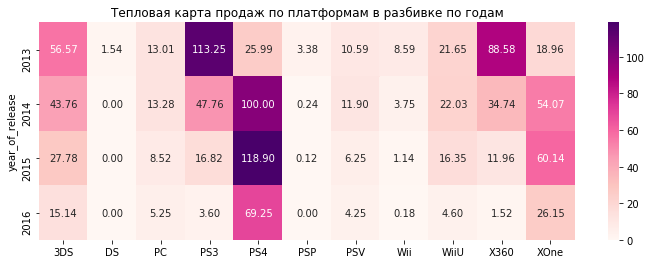

In [27]:
# Построим тепловую карту доходов платформ в разбивке по годам.
plt.figure(figsize=(12, 4))
sns.heatmap(pivot_sales2013, annot=True, fmt="0.2f", cmap='RdPu')
plt.title('Тепловая карта продаж по платформам в разбивке по годам')

Мы предполагаем, что данные за 2016 еще не совсем полные, так как у нас только декабрь. Исходя из этого утверждения, можно выделить платформы, продажи которых идут в последние года на увеличение - PS4 и XOne. Они появились только в 2013 года и сейчас идут к своим пикам продаж.

- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

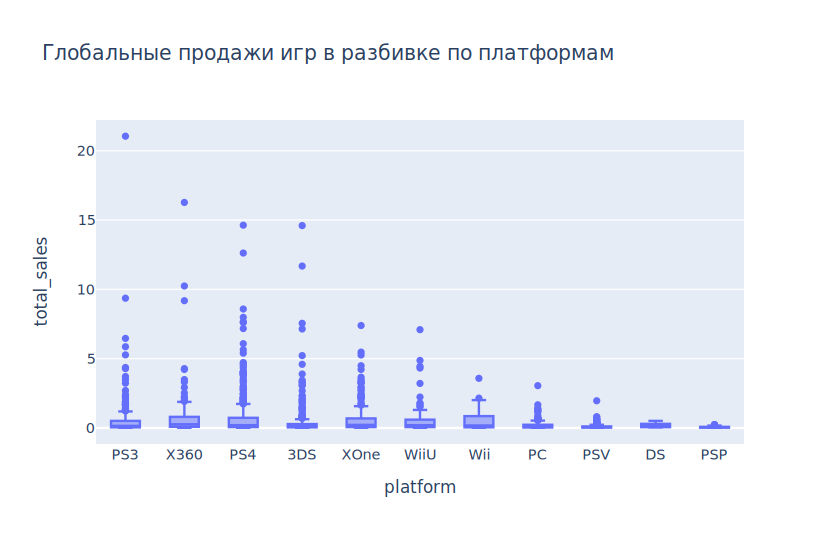

In [28]:
fig = px.box(data.query('year_of_release > 2012'), 
       x='platform', 
       y='total_sales', 
       title='Глобальные продажи игр в разбивке по платформам')
fig.show()

На графиках «ящик с усами» видим больше количество выбросов, которые мешают посмотреть их более подробно. 

In [29]:
pivot_sales2013.describe()

,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,4.000000,4.000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,35.812500,0.385,10.015000,45.357500,78.535000,0.935000,8.247500,3.415000,16.157500,34.200000,39.830000
std,18.128338,0.770,3.854456,48.898675,40.567917,1.632942,3.596205,3.765355,8.129507,38.816131,20.313977
min,15.140000,0.000,5.250000,3.600000,25.990000,0.000000,4.250000,0.180000,4.600000,1.520000,18.960000
25%,24.620000,0.000,7.702500,13.515000,58.435000,0.090000,5.750000,0.900000,13.412500,9.350000,24.352500
50%,35.770000,0.000,10.765000,32.290000,84.625000,0.180000,8.420000,2.445000,19.000000,23.350000,40.110000
75%,46.962500,0.385,13.077500,64.132500,104.725000,1.025000,10.917500,4.960000,21.745000,48.200000,55.587500
max,56.570000,1.540,13.280000,113.250000,118.900000,3.380000,11.900000,8.590000,22.030000,88.580000,60.140000


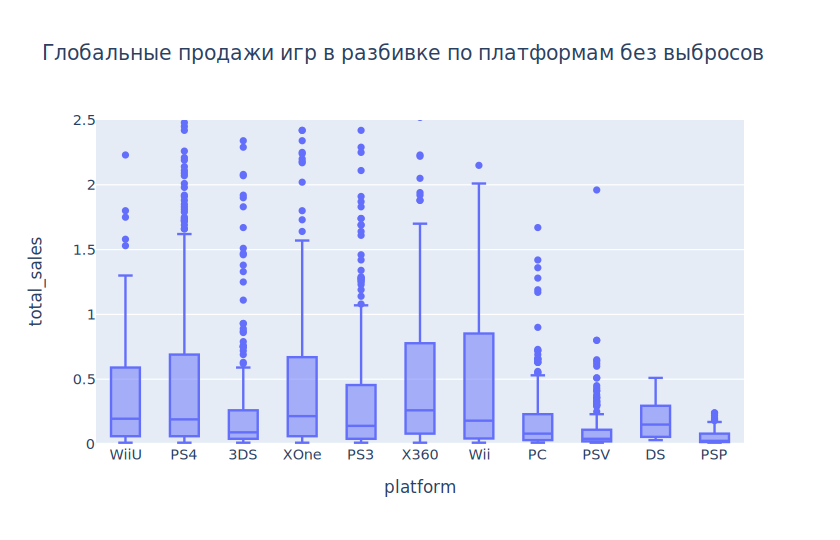

In [30]:
fig1 = px.box(data.query('year_of_release > 2012 & total_sales < 5'), 
       x='platform', 
       y='total_sales', 
       title='Глобальные продажи игр в разбивке по платформам без выбросов')
fig1.update_yaxes(range=(0, 2.5))
fig1.show()

- самые маленькие std мы видим на платформах DS, PSP, PSV, самые большые std у PS3,PS4 и X360. 
- самые большие выбросы в продажах видим для платформ - WiiU, PS4, 3DS, соответственно и самые больше средние значения, поэтому у них же разница между средним и медианой будет больше, чем на остальных платформах.
- меньше всего продаж за последние 4 года было у платформ PSP, PSV и DS, а самые высокие продажи у PS4, PS3, XOne.

----------------------------------------------------------------------------

- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.

In [31]:
# Не увидела в начале, что столбец "user_score" имеет тип данных object, 
# это мешает нам построить график с этими занчениями.
# поэтому необходимо перевести их в тип float64, сделаем это при помощи метода to_numeric().
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int32  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


In [32]:
# Создадим датафрейм исключительно с играми для платформы PS4, 
# так как с 2013 года у нее были самые высокие продажи и самое большое количество проданных игр.

data_ps4 = data.query('platform == "PS4" and critic_score != 200 and user_score != 200')
data_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


0.4058948014583663

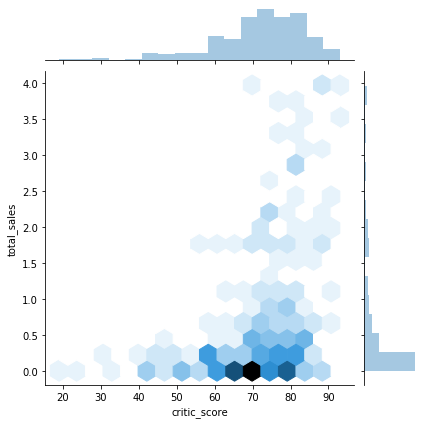

In [33]:
sns.jointplot(data=data_ps4.query('total_sales < 4'), 
              x='critic_score', 
              y='total_sales', 
              kind='hex')
data_ps4['critic_score'].corr(data_ps4['total_sales'])

-0.03362497596528881

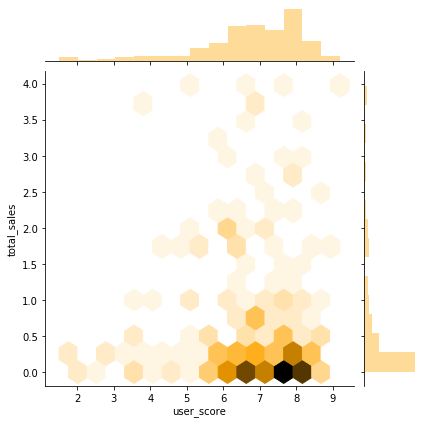

In [34]:
sns.jointplot(data=data_ps4.query('total_sales < 4'), 
              x='user_score', 
              y='total_sales', 
              kind='hex',
             color='orange')
data_ps4['user_score'].corr(data_ps4['total_sales'])

Взаимосвязь между продажами и оценками критиков положительная, но не велика, в своб очередь корреляция оценки пользователей и продаж отрицательная и при этом очень незначительна.

In [35]:
# Посчитаем корреляцию между оценкой пользователей и продажами для других платформ.
corr_dict = dict()
top_platforms_nops4 = ['PS3', 'X360', 'XOne', '3DS']
data_no_ps4 = data.query(
    'platform == @top_platforms_nops4 and critic_score != 200 and user_score != 200')

corr_dict = dict()
for name in top_platforms_nops4:
    corr_dict[name] = data_no_ps4.query('platform == @name')['critic_score'].corr(
        data_no_ps4.query('platform == @name')['total_sales']).round(4)
 
print('Корреляция оценки критиков и суммарных продаж')
print(corr_dict)

Корреляция оценки критиков и суммарных продаж
{'PS3': 0.4279, 'X360': 0.3895, 'XOne': 0.4104, '3DS': 0.3398}


In [36]:
corr_dict = dict()
for name in top_platforms_nops4:
    corr_dict[name] = data_no_ps4.query('platform == @name')['user_score'].corr(
        data_no_ps4.query('platform == @name')['total_sales']).round(4)
 
print('Корреляция оценки пользователей и суммарных продаж')
print(corr_dict)

Корреляция оценки пользователей и суммарных продаж
{'PS3': 0.1433, 'X360': 0.1104, 'XOne': -0.094, '3DS': 0.2334}


In [37]:
data_ps4 = data.query(
    'platform == "PS4" and critic_score != 200 and user_score != 200')
data_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


Корреляция между оценкой критиков и продажами для выбранной платформы и для остальных платформ приблизительно одинаковая, +- 0.06.

Корреляяция же между оценкой пользователей и продажами сильно отличается в зависимости от платформы. Не на всех мы видим такую же отрицательную корреляцию, как для PS4, здесь различия достигают 0.2!

Мизерная разница в корреляциях между оценкой критиков и продажами для разных платформ говорит о том, что пользователи всех платформ доверяют мнению критиков, поэтому чем выше их оценка, тем охотнее люди покупают игры, которые советуют профессионалы.

Сильное различие же в корреляциях между оценкой пользователей и продажами да и в целом небольшое значение корреляции говорит о следующем:
1. пользователи меньше доверяют оценкам других пользователей, а больше критикам;
2. кто-то читает чужие мнения и верит им, поэтому при высокой оценке покупает игру, а при низкой отказывается от покупки и проверки данной оценки. Другие пользователи при виде негативного комментария намеренно покупает игру, чтобы убедиться в чужий утверждениях самому. 
3. самый высокий показатель корреляции (положительной) между оценкой пользователей и продажами у платформы 3DS,пользователи которой верят мнению других пользователей почти также охотно, как и мнению критиков. В то же время корреляция между мнением критиков и продажами самая низкая, хоть и положительная.

- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? 
- Выделяются ли жанры с высокими и низкими продажами?

In [38]:
pivot_genres = data.pivot_table(index='genre',
                       values='total_sales',
                       aggfunc='sum').reset_index()
display(pivot_genres.describe())
display(pivot_genres.sort_values('total_sales', ascending=False))

,total_sales
count,12.000000
mean,742.774167
std,479.876035
min,174.230000
25%,353.120000
50%,765.590000
75%,964.032500
max,1744.170000


,genre,total_sales
0,Action,1744.17
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77
3,Misc,802.51
6,Racing,728.67
2,Fighting,447.53
9,Simulation,389.97
5,Puzzle,242.57


Всего имеем 12 жанров, среднее и медиана различаются не очень сильно +- 10 млн и приблизительно равны 747 млн копий.

Если опираться на среднее/медиану продаж в разбивке по жанрам, то мы вполне можем разделить все на жанры на более и менее популярные.

- Более популярные: экшн, спортивные, шутеры, ролевые. 
- Менее популярные: гонки, файтинг, симуляторы, головоломки, приключения и стратегии.

### Шаг 4. Портрет пользователя каждого региона. <a id=step4></a>

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [39]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,200,200.0,200,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,200,200.0,200,31.38


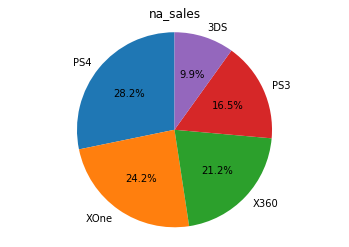

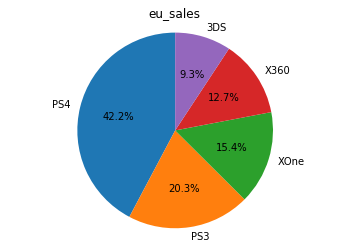

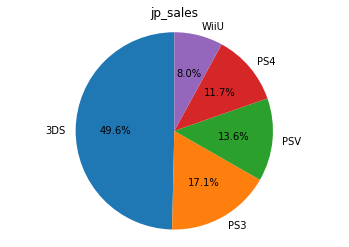

In [40]:
# Таким же образом посмотрим на топ 5 популярных платформ в каждом регионе.
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    genres_by_regions = (data.query('year_of_release > 2012')
                         .groupby('platform')[region]
                         .sum()
                         .sort_values(ascending=False))
    genres_by_regions = genres_by_regions.head()
    labels = genres_by_regions.index
    fig, ax = plt.subplots()
    ax.pie(genres_by_regions, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis("equal")
    plt.title(region)
    plt.show()

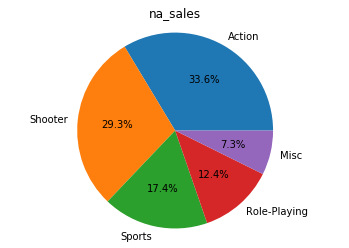

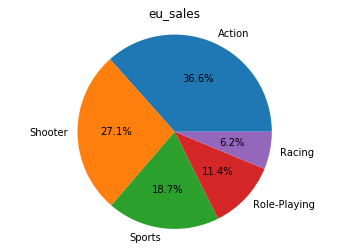

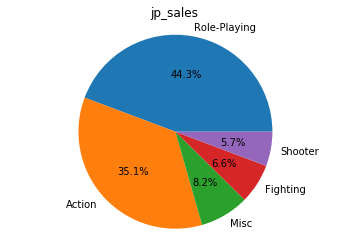

In [41]:
# Создадим цикл, который покажет топ 5 жанров с самыми высокими продажами по каждому региону.
# И построим график для каждого региона.

for region in ['na_sales', 'eu_sales', 'jp_sales']:
    genres_by_regions = (data.query('year_of_release > 2012')
                         .groupby('genre')[region]
                         .sum()
                         .sort_values(ascending=False))
    genres_by_regions = genres_by_regions.head()
    labels = genres_by_regions.index
    fig, ax = plt.subplots()
    ax.pie(genres_by_regions, labels=labels, autopct='%1.1f%%')
    ax.axis("equal")
    plt.title(region)
    plt.show()

In [42]:
data_3ds = data.query('platform == "3DS" and year_of_release > 2012')
data_3ds.groupby('genre')['jp_sales'].sum().sort_values()
#data_jp_ps = data.query('platform == "PS3" or platform == "PS4" and year_of_release > 2012')
#data_jp_ps.groupby('genre')['jp_sales'].sum()

genre
Shooter          0.00
Strategy         0.71
Sports           0.81
Puzzle           0.87
Platform         1.81
Adventure        1.95
Fighting         2.92
Misc             3.81
Simulation       4.07
Action          17.09
Role-Playing    33.77
Name: jp_sales, dtype: float64

#### Вывод
#### Платформы
Япония. Все топ 5 консолей из списка производятся в Японии, соответственно, нет смысла покупать что-то другое. Но интересно, что в Японии самая популярная платформа - портативная Nintendo 3DS. Это можно объяснить тем, что в Японии люди больше времени тратят на работе, а для отдыха его почти не остается, поэтому чтобы не теряться, им удобнее ее брать с собой. 

Европа. Здесь на рынке появляются американские консоли XOne и X360, однако они не стали настолько же популярными как патформы серии PS.

В Америке же численность консолей XBox гораздо выше, чем в Европе, так как они пошли именно из Америки, однако они не сильно обгоняют PS3 и 4 по количеству проданных на них игр. Это связано с изначально неправильным позиционированием платформ, маркетологи представили их как хаб для телевизора, а не игровые приставку.

Из этого можем сделать вывод, что для японцев важно, чтобы они могли в любой момент взять приставку и поиграть, поэтому предпочтение отдается портативным небольшим вариантам, которые можно взять с собой. Европейцы и американцы предпочитают играть в спокойной домашней обстановке одни или с друзьями.

#### Жанры
В Японии самым популярным жанром стал RPG, который как раз широко представлен среди игр для платформы 3DS, в отличии от других консолей. Экшн стоит на втором месте, так как на всех PS этот жанр занимает достаточно болшую нишу, так как он ориентирован не только на Японию, но и на другие страны, о чем как раз свидетельствуют диаграммы для Северной Америки и Европы.

Америка и Европа очень похожи по популярным жанрам: на первом месте Экшн, на втором - шутер, на третьем - спортивные, 4ое - Role-Playing (RPG).

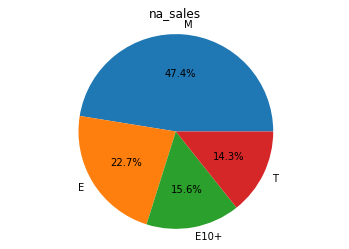

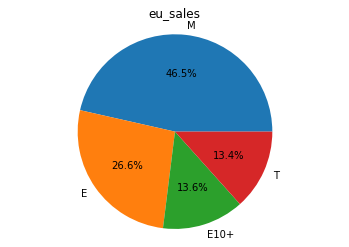

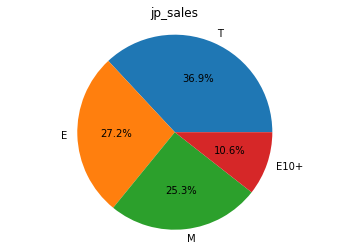

In [43]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    rating_region = (data.query('year_of_release > 2012 and rating != 200')
                     .groupby('rating')[region]
                     .sum()
                     .sort_values(ascending=False))
    labels = rating_region.index
    fig, ax = plt.subplots()
    ax.pie(rating_region, labels=labels, autopct='%1.1f%%')
    ax.axis("equal")
    plt.title(region)
    plt.show()

#### Вывод
Как в Америке, так и в Европе, почти 50% купленних игр имееи рейтинг «M» «Для взрослых», следом по популярности игры с рейтинго «E» «Для всех», на третьем месте игры «E10+» «Для всех от 10 лет и старше» и в самом конце игры для подростков. В Америке и Европе играми больше заняты взрослые уже состоявшиеся люди.

В Японии все иначе: самые популярные (почти 37%) «T» «Подросткам», на втором месте - «E» «Для всех», на третьем только «M» «Для взрослых» и в самом конце уже «E10+» «Для всех от 10 лет и старше». В Японии больше всего играют подростки.

### Шаг 5. Проверка гипотезы. <a id=step5></a>

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

-------------------------------------------------------------------------------
1. Пороговое значение alpha для проверки обеих гипотез будет 0.05.
2. Нулевая гипотеза в обоих случаях будет содержать утреждение, которое содержит в себе равенство, то есть мы будет предполагать, что не найдем никаких жкстремальных значений. Альтернативная гипотеза будет содержать противоположное утверждение.
3. Мы собраемся сравнивать средние двух независимых выборок, для этого будем использовать тест Стьюдента - ttest_ind, так как пока что не знакома с другими критериями.

-----------------------------------------------------------------------------
##### Проверим первую гипотезу
Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [44]:
# Сначала нужно создать необходимые для сравнения датасеты:
data_xone = data.query(
    'platform == "XOne" and year_of_release > 2012 and user_score != 200')
data_pc = data.query(
    'platform == "PC" and year_of_release > 2012 and user_score != 200')

In [45]:
# Теперь сравним дисперсии наших независимых выборок, 
# чтобы определить параметр equal_var 
var1 = np.var(data_xone['user_score'])
display(var1)
var2 = np.var(data_pc['user_score'])
display(var2)

1.8965188383045533

2.9913239064252517

In [46]:
alpha = 0.05
result = st.ttest_ind(data_xone['user_score'], 
                      data_pc['user_score'], 
                      equal_var=False)
print('p-значение равно:', result.pvalue)
if result.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Недостаточно оснований отклонить нулевую гипотезу')

p-значение равно: 0.16174359801784308
Недостаточно оснований отклонить нулевую гипотезу


In [47]:
data_xone.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,2014.934066,0.431923,0.238132,0.001593,0.066044,85.423077,6.521429,0.737692
std,0.989472,0.620657,0.377369,0.005679,0.092520,38.864435,1.380941,1.018062
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.600000,0.010000
25%,2014.000000,0.040000,0.020000,0.000000,0.010000,69.000000,5.800000,0.082500
50%,2015.000000,0.170000,0.090000,0.000000,0.030000,77.000000,6.800000,0.300000
75%,2016.000000,0.557500,0.275000,0.000000,0.090000,85.000000,7.500000,1.057500
max,2016.000000,3.220000,2.190000,0.040000,0.480000,200.000000,9.200000,5.470000


In [48]:
data_pc.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,158.000000,158.000000,158.000000,158.0,158.000000,158.000000,158.000000,158.000000
mean,2014.588608,0.065127,0.143291,0.0,0.017468,81.101266,6.280380,0.225886
std,1.129397,0.134651,0.213241,0.0,0.031762,27.665009,1.735044,0.364697
min,2013.000000,0.000000,0.000000,0.0,0.000000,33.000000,1.400000,0.010000
25%,2014.000000,0.000000,0.030000,0.0,0.000000,71.000000,5.325000,0.030000
50%,2015.000000,0.005000,0.070000,0.0,0.010000,78.000000,6.800000,0.100000
75%,2016.000000,0.080000,0.150000,0.0,0.020000,84.000000,7.600000,0.247500
max,2016.000000,1.000000,1.820000,0.0,0.230000,200.000000,9.300000,3.050000


p-значение слишком мало, чтобы отвергать гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC. Вероятность получить такие или еще большие различия 15%.

##### Проверим вторую гипотезу
Н0: Средние пользовательские рейтинги жанров Action и Sports не различаются.

Н1: Средние пользовательские рейтинги жанров Action и Sports разные.

In [49]:
# Опять же сначала создадим необходимые для анализа датасеты:
data_action = data.query(
    'genre == "Action" and year_of_release > 2012 and user_score != 200')
data_sports = data.query(
    'genre == "Sports" and year_of_release > 2012 and user_score != 200')


In [50]:
# Теперь сравним дисперсии наших независимых выборок, 
# чтобы определить параметр equal_var 
var3 = np.var(data_action['user_score'])
var4 = np.var(data_sports['user_score'])
print(var3)
print(var4)

1.761935586734693
3.1607339843749975


In [51]:
alpha = 0.05
result = st.ttest_ind(data_action['user_score'], 
                      data_sports['user_score'],
                      equal_var=False)
print('p-значение:', result.pvalue)
if result.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Недостаточно оснований отклонить нулевую гипотезу')

p-значение: 1.3883444596405356e-20
Отклоняем нулевую гипотезу


In [52]:
data_action.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,2014.466837,0.276811,0.257577,0.041148,0.081250,97.852041,6.837500,0.656786
std,1.081782,0.727711,0.691149,0.110386,0.258054,52.849916,1.329076,1.674327
min,2013.000000,0.000000,0.000000,0.000000,0.000000,26.000000,2.000000,0.010000
25%,2014.000000,0.010000,0.020000,0.000000,0.010000,69.000000,6.300000,0.070000
50%,2014.000000,0.070000,0.075000,0.000000,0.020000,76.000000,7.100000,0.200000
75%,2015.000000,0.260000,0.260000,0.030000,0.070000,87.000000,7.800000,0.625000
max,2016.000000,9.660000,9.090000,1.110000,3.960000,200.000000,9.100000,21.050000


In [53]:
data_sports.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,2014.537500,0.400875,0.371125,0.013688,0.120000,112.143750,5.238125,0.905687
std,1.063325,0.531849,0.908443,0.037712,0.210139,60.869057,1.783427,1.350455
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2014.000000,0.030000,0.030000,0.000000,0.010000,73.000000,4.100000,0.120000
50%,2015.000000,0.160000,0.105000,0.000000,0.050000,83.000000,5.500000,0.435000
75%,2015.000000,0.585000,0.270000,0.000000,0.132500,200.000000,6.500000,1.035000
max,2016.000000,2.490000,6.120000,0.220000,1.370000,200.000000,8.800000,8.580000


Наш t-тест показал, что у нас недостаточно оснований оставить нулевую гипотезу, поэтому в силу вступает гипотеза о различии средних пользовательских рейтингах жанров Action и Sports.

### Шаг 6. Общий вывод. <a id=step6></a>

##### В ходе исследовательской работы мы пришли к следущим выводам:
- мы выяснили, что средний жизненный цик платформы примерно 10-12 лет, пика продаж достигает примерно за 5-6 лет. Так как нам нужны потенциально прибыльные платформы решили рассматривать период за последние 4 года.
- есть две платформы, которые с каждым годом увеличивают свои продажи (считаем, что за 2016 год пришли еще не все данные) - PS4 и XOne. Они появились только в 2013 года и сейчас идуте к своим пикам продаж.
- самые большие выбросы в продажах у платформ - WiiU, PS4, 3DS, соответственно и самые больше средние значения.
- меньше всего продаж за последние 4 года было у платформ PSP, PSV и DS, а самые высокие продажи у PS4, PS3, XOne.
----------------------------------------------------------------------------
- мы простроили графики и посчитали корреляцию между отзывами и продажами, оказалось, взаимосвязь между продажами и оценками критиков небольшая и имеет положительную направленность, а корреляция оценки пользователей и продаж отрицательна и при этом очень незначительна.
- корреляция между оценкой критиков и продажми для выбранной платформы и для остальных платформ приблизительно одинаковая, разброс составляет +- 0.06.
- корреляяция же между оценкой пользователей и продажами сильно отличается в зависимости от платформы. Не на всех мы видим такую же отрицательную корреляцию, как для PS4, здесь различия достигают 0.2!
----------------------------------------------------------------------------
- если опираться на среднее/медиану продаж в разбивке по жанрам, то мы вполне можем разделить все жанры на более и менее популярные.
        - Более популярные: экшн, спортивные, шутеры, ролевые. 
        - Менее популярные: гонки, файтинг, симуляторы, головоломки, приключения и стратегии.
----------------------------------------------------------------------------
- для Японии в топ 5 используемых платформ входят те, что производятся в Японии, но самый популярный вариант - портативная 3DS, котору. можно взять с собой.
- в Америке в равной степени популярны консоли XBox и PS.
- в Европе большую популярность имеют PS, а на втором месте XBox.
----------------------------------------------------------------------------
- распределение в топ 5 популярных жарнов почти одинаково для Америки и Европы: Экшн, Шутеры, Спортивные, Ролевые и только в последнем пункте отличия - Америка - остальные жанры, Европа - Гонки. 
- в Японии же распределение идет совершенно иначе: Ролевые, Экшн, другие, Файтинг и Шутеры.
----------------------------------------------------------------------------
- проанализировав рейтин ESRB, мы выяснили, что в Америке и Европе больше попурялны игры с рейтингом М и Е. 
- в Японии же больше играют в игры с рейтингом Т, Е и М.